In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Séries Temporais

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-11-13 21:30:34.054135: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 21:30:34.150858: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 21:30:34.527167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 21:30:34.527182: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 21:30:34.529508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [31]:
train = pd.read_table('./archive/2004-2021.tsv')
train.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [32]:
# Convertendo a coluna 'DATA INICIAL' para o tipo datetime
train['DATA INICIAL'] = pd.to_datetime(train['DATA INICIAL'])

# Filtrando os dados para incluir apenas os registros a partir de 2013
filtered_data = train[train['DATA INICIAL'] >= '2013-01-01']

In [34]:
filtered_data.set_index('DATA INICIAL', inplace=True)

In [35]:
filtered_data



,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
DATA INICIAL,,,,,,,,,,,,,,,,,
2013-01-06,2013-01-12,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.543,0.141,2.350,3.120,0.33,0.055,2.213,0.151,2.037,2.4745,0.068
2013-01-06,2013-01-12,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.291,0.062,2.190,2.499,0.249,0.027,2.042,0.05,1.9383,2.1609,0.024
2013-01-06,2013-01-12,NORTE,AMAPA,ETANOL HIDRATADO,8,R$/l,2.268,0.044,2.180,2.320,-,0.019,-,-,-,-,-
2013-01-06,2013-01-12,NORTE,AMAZONAS,ETANOL HIDRATADO,77,R$/l,2.316,0.072,2.230,2.620,0.2,0.031,2.116,0.043,1.995,2.2112,0.02
2013-01-06,2013-01-12,NORDESTE,BAHIA,ETANOL HIDRATADO,411,R$/l,2.193,0.125,1.840,2.599,0.277,0.057,1.916,0.107,1.64,2.1729,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [36]:
filtered_data.index = pd.to_datetime(filtered_data.index)

In [66]:
mask = filtered_data['PREÇO MÉDIO REVENDA'] < 0
mean_value = filtered_data.loc[~mask, 'PREÇO MÉDIO REVENDA'].mean()
filtered_data.loc[mask, 'PREÇO MÉDIO REVENDA'] = mean_value

In [67]:
len(mask)

65064

In [38]:
cut_point = int(len(filtered_data) * 0.8)

In [39]:
train, test = filtered_data.iloc[:cut_point], filtered_data.iloc[cut_point:]


In [40]:
time_series_full = pd.concat([train,test])
time_series_full

,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
DATA INICIAL,,,,,,,,,,,,,,,,,
2013-01-06,2013-01-12,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.543,0.141,2.350,3.120,0.33,0.055,2.213,0.151,2.037,2.4745,0.068
2013-01-06,2013-01-12,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.291,0.062,2.190,2.499,0.249,0.027,2.042,0.05,1.9383,2.1609,0.024
2013-01-06,2013-01-12,NORTE,AMAPA,ETANOL HIDRATADO,8,R$/l,2.268,0.044,2.180,2.320,-,0.019,-,-,-,-,-
2013-01-06,2013-01-12,NORTE,AMAZONAS,ETANOL HIDRATADO,77,R$/l,2.316,0.072,2.230,2.620,0.2,0.031,2.116,0.043,1.995,2.2112,0.02
2013-01-06,2013-01-12,NORDESTE,BAHIA,ETANOL HIDRATADO,411,R$/l,2.193,0.125,1.840,2.599,0.277,0.057,1.916,0.107,1.64,2.1729,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


# Criando Defasagens (lags)

São valores passados da série temporal em relação ao valor atual. Para a base da temperatura, ela pode ser explicada com os dados umidade (humidity), velocidade do vento (wind speed) e pressão atmosférica média (mean pressure).

Entretanto, em muitos estudos de série temporal, não temos variáveis explicativas além da própria série alvo (histórico da variável resposta). Nesse cenário, usamos o próprio histórico da série como variável explicativa. Para isso, usamos observações anteriores para explicar o comportamento atual da série.

In [41]:
time_series_full['preco_m_1lag'] = [0]+list(time_series_full['PREÇO MÉDIO REVENDA'].values)[:-1]
time_series_full['preco_m_2lag'] = [0,0]+list(time_series_full['PREÇO MÉDIO REVENDA'].values)[:-2]
time_series_full['preco_m_3lag'] = [0,0,0]+list(time_series_full['PREÇO MÉDIO REVENDA'].values)[:-3]
time_series_full['preco_m_4lag'] = [0,0,0,0]+list(time_series_full['PREÇO MÉDIO REVENDA'].values)[:-4]
time_series_full['preco_m_5lag'] = [0,0,0,0,0]+list(time_series_full['PREÇO MÉDIO REVENDA'].values)[:-5]

In [42]:
time_series_full.head(7)

,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,...,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,preco_m_1lag,preco_m_2lag,preco_m_3lag,preco_m_4lag,preco_m_5lag
DATA INICIAL,,,,,,,,,,,,,,,,,,,,,
2013-01-06,2013-01-12,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.543,0.141,2.350,3.120,...,2.213,0.151,2.037,2.4745,0.068,0.000,0.000,0.000,0.000,0.000
2013-01-06,2013-01-12,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.291,0.062,2.190,2.499,...,2.042,0.05,1.9383,2.1609,0.024,2.543,0.000,0.000,0.000,0.000
2013-01-06,2013-01-12,NORTE,AMAPA,ETANOL HIDRATADO,8,R$/l,2.268,0.044,2.180,2.320,...,-,-,-,-,-,2.291,2.543,0.000,0.000,0.000
2013-01-06,2013-01-12,NORTE,AMAZONAS,ETANOL HIDRATADO,77,R$/l,2.316,0.072,2.230,2.620,...,2.116,0.043,1.995,2.2112,0.02,2.268,2.291,2.543,0.000,0.000
2013-01-06,2013-01-12,NORDESTE,BAHIA,ETANOL HIDRATADO,411,R$/l,2.193,0.125,1.840,2.599,...,1.916,0.107,1.64,2.1729,0.056,2.316,2.268,2.291,2.543,0.000
2013-01-06,2013-01-12,NORDESTE,CEARA,ETANOL HIDRATADO,206,R$/l,2.206,0.088,2.089,2.499,...,2.031,0.056,1.7332,2.1547,0.028,2.193,2.316,2.268,2.291,2.543
2013-01-06,2013-01-12,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,80,R$/l,2.270,0.026,2.170,2.299,...,1.874,0.014,1.8491,1.8892,0.007,2.206,2.193,2.316,2.268,2.291


**Contextualizando**
No dia 01/01/2013 (primeira linha), a temperatura era igual a 10.

Com uma defasagem, vamos usar a temperatura do dia 01/01/2013 para explicar a temperatura do próximo dia: 02/01/2013. Portanto, a coluna *meantemp_1lag* consta com o valor 10 (temperatura do dia 01/01/2013) no dia 02/01/2013. Afinal, a ideia consiste em usar a temperatura do dia anterior para explicar a temperatura da data atual (considerando a data atual sendo 02/01/2013).

É importante ressaltar que: **a quantidade de defasagem corresponde a quantidade de linhas da fonte de dados que vamos desconsiderar**. Note que na coluna meantemp_1lag, o primeiro valor é 0, pois não temos dados anteriores a 01/01/2013. Já na coluna *meantemp_5lag*, os 5 primeiros valores são 0, visto que não temos os dados dos primeiros 5 dias.

Logo, será necessário remover as 5 primeiras linhas da tabela, se optarmos por utilizar 5 defasagens como variáveis explicativas.

In [43]:
print(len(time_series_full))
time_series_full = time_series_full.loc[(time_series_full.preco_m_5lag > 0)]
print(len(time_series_full))

65064
65059


In [44]:
len(train.index)

52051

In [45]:
train = time_series_full.loc[(time_series_full.index.isin(train.index))]
train.tail()

,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,...,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,preco_m_1lag,preco_m_2lag,preco_m_3lag,preco_m_4lag,preco_m_5lag
DATA INICIAL,,,,,,,,,,,,,,,,,,,,,
2019-08-11,2019-08-17,NORTE,RORAIMA,OLEO DIESEL S10,13,R$/l,3.614,0.077,3.520,3.790,...,3.205,0.064,3.1254,3.3268,0.02,3.860,3.542,3.766,3.653,3.744
2019-08-11,2019-08-17,SUL,SANTA CATARINA,OLEO DIESEL S10,218,R$/l,3.520,0.166,3.129,3.999,...,3.011,0.159,2.85,3.4,0.053,3.614,3.860,3.542,3.766,3.653
2019-08-11,2019-08-17,SUDESTE,SAO PAULO,OLEO DIESEL S10,1284,R$/l,3.540,0.171,3.149,4.459,...,3.108,0.106,2.88,3.5083,0.034,3.520,3.614,3.860,3.542,3.766
2019-08-11,2019-08-17,NORDESTE,SERGIPE,OLEO DIESEL S10,42,R$/l,3.633,0.124,3.439,3.820,...,3.248,0.048,3.1281,3.369,0.015,3.540,3.520,3.614,3.860,3.542
2019-08-11,2019-08-17,NORTE,TOCANTINS,OLEO DIESEL S10,45,R$/l,3.595,0.296,3.270,5.070,...,3.158,0.078,3.05,3.26,0.025,3.633,3.540,3.520,3.614,3.860


In [46]:
test = time_series_full.loc[(time_series_full.index.isin(test.index))]
test.tail()

,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,...,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,preco_m_1lag,preco_m_2lag,preco_m_3lag,preco_m_4lag,preco_m_5lag
DATA INICIAL,,,,,,,,,,,,,,,,,,,,,
2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4.503,4.140,4.699,4.302,4.382
2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4.582,4.503,4.140,4.699,4.302
2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4.141,4.582,4.503,4.140,4.699
2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4.246,4.141,4.582,4.503,4.140
2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,...,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4.464,4.246,4.141,4.582,4.503


In [47]:
test.columns

Index(['DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'preco_m_1lag', 'preco_m_2lag', 'preco_m_3lag', 'preco_m_4lag',
       'preco_m_5lag'],
      dtype='object')

# Modelagem de Séries Temporais

### Rede Neural LSTM

A arquitetura LSTM de rede neural funciona a partir das unidades. Cada unidade é como se fosse um neurônio que é conectado ao outro de maneira sequencial:

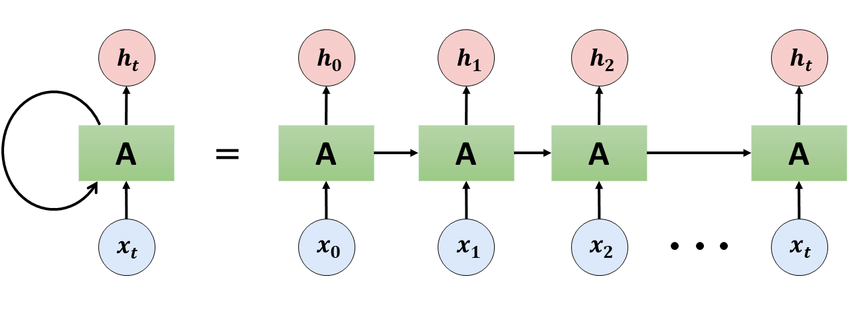

No exemplo acima, a gente compreende o motivo dessa rede ser Recorrente. Ou seja, o primeiro neurônio recebe uma entrada e gera uma saída. Essa saída é utilizada pelo neurônio seguinte, ao longo do tempo.

A arquitetura LSTM usa esse princípio combinando com particularidades extra:

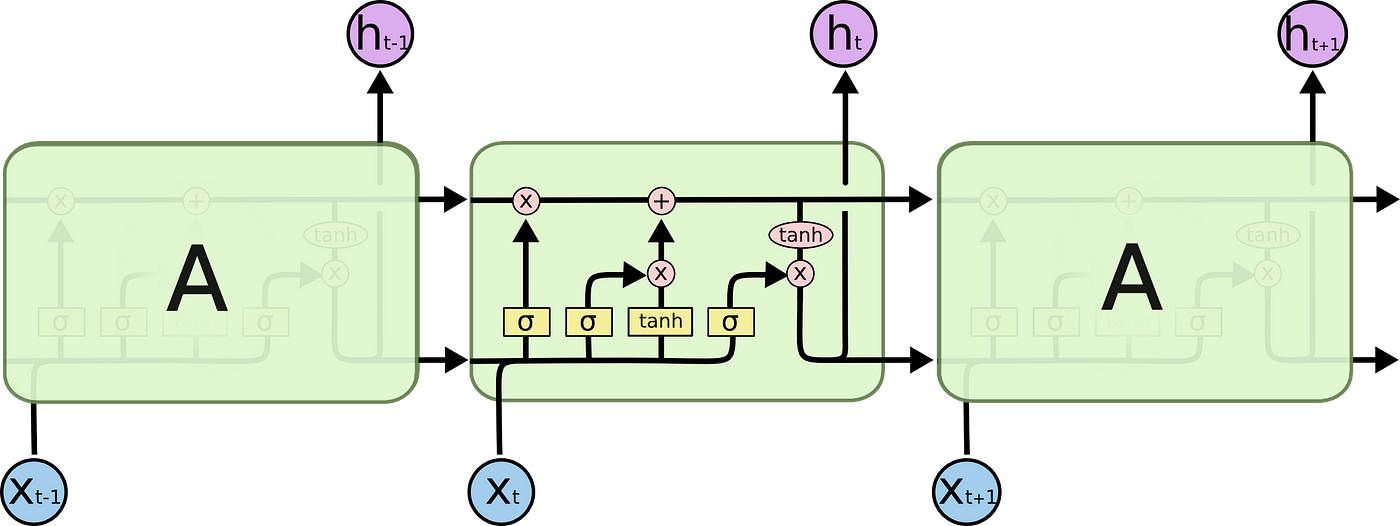

Na imagem acima, temos o seguinte exemplo:

O "X" do tempo anterior (t-1) é a entrada da unidade. Há a arquitetura da rede neural LSTM que analisa a entrada e gera 3 saídas. h(t-1) e mais duas saídas. A saída h (t-1) é uma parte do conhecimento da rede neural que será descartada. Já as outras duas saídas representadas pelas setas, seguem conectadas a próxima unidade da rede neural que vai receber a variável X (t). Portanto, é importante notar que além de receber a variável X no momento posterior, esse neurônio/unidade recebe também a experiência obtida no momento anterior (t-1).

Se observarmos uma unidade isoladamente, fica claro o que é recebido, "esquecido" e passado para a próxima unidade:

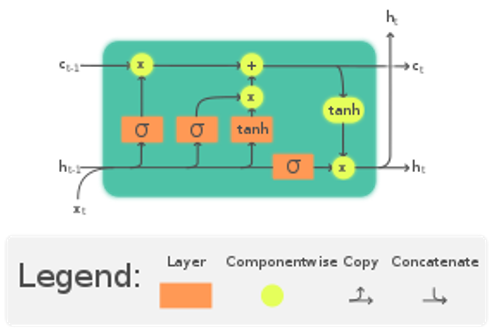

* Ct-1: é o output gerado pela unidade anterior e é aproveitado pela unidade atual;
* Ht-1: é o output gerado pela unidade anterior que é vinculado ao X atual e analisado pela unidade atual;
* H t: é o conhecimento gerado pela unidade. Uma parte dele é esquecido e outra parte é levada adiante;
* C t: é outro output gerado pela unidade LSTM que será utilizado na próxima unidade;
* A parte laranja são funções de ativação. Tangentes e sigmoids.
* A parte amarela envolve os vetores com valores e uma função de ativação tangente.

In [48]:
# Passo 1: separando X e Y e normalizando os dados

X = train[['preco_m_1lag',	'preco_m_2lag',	'preco_m_3lag',	'preco_m_4lag',	'preco_m_5lag']]
y = train["PREÇO MÉDIO REVENDA"]

# Normalização dos dados
# Normalize os dados (opcional, mas pode melhorar o desempenho da rede)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Converta os dados para o formato 3D esperado pela LSTM (samples, timesteps, features)
# Nesse caso, como temos apenas uma variável explicativa (3 features), definimos timesteps = 1.
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [49]:
len(X),len(y)

(52108, 52108)

In [50]:
X_lstm.shape #1462 linhas na base, por 1 data, com 3 variáveis explicativas em cada data

(52108, 1, 5)

### LSTM: Modelo 1

In [51]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model1.add(Dense(units=1))

# Passo 3: Compile o modelo

model1.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history1 = model1.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


1629/1629 [==============================] - 1s 595us/step - loss: 0.0074
Epoch 2/200
1629/1629 [==============================] - 1s 608us/step - loss: 0.0056
Epoch 3/200
1629/1629 [==============================] - 1s 605us/step - loss: 0.0054
Epoch 4/200
1629/1629 [==============================] - 1s 608us/step - loss: 0.0051
Epoch 5/200
1629/1629 [==============================] - 1s 611us/step - loss: 0.0050
Epoch 6/200
1629/1629 [==============================] - 1s 583us/step - loss: 0.0048
Epoch 7/200
1629/1629 [==============================] - 1s 600us/step - loss: 0.0048
Epoch 8/200
1629/1629 [==============================] - 1s 615us/step - loss: 0.0047
Epoch 9/200
1629/1629 [==============================] - 1s 606us/step - loss: 0.0046
Epoch 10/200
1629/1629 [==============================] - 1s 608us/step - loss: 0.0046
Epoch 11/200
1629/1629 [==============================] - 1s 586us/step - loss: 0.0045
Epoch 12/200
1629/1629 [==============================] - 1s 609

### LSTM: Modelo 2

In [52]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model2 = Sequential()
model2.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model2.add(Dense(units=1))

# Passo 3: Compile o modelo

model2.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history2 = model2.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


1629/1629 [==============================] - 2s 705us/step - loss: 0.0067
Epoch 2/200
1629/1629 [==============================] - 1s 705us/step - loss: 0.0053
Epoch 3/200
1629/1629 [==============================] - 1s 663us/step - loss: 0.0051
Epoch 4/200
1629/1629 [==============================] - 1s 709us/step - loss: 0.0050
Epoch 5/200
1629/1629 [==============================] - 1s 709us/step - loss: 0.0049
Epoch 6/200
1629/1629 [==============================] - 1s 718us/step - loss: 0.0048
Epoch 7/200
1629/1629 [==============================] - 1s 682us/step - loss: 0.0047
Epoch 8/200
1629/1629 [==============================] - 1s 693us/step - loss: 0.0047
Epoch 9/200
1629/1629 [==============================] - 1s 703us/step - loss: 0.0046
Epoch 10/200
1629/1629 [==============================] - 1s 708us/step - loss: 0.0045
Epoch 11/200
1629/1629 [==============================] - 1s 707us/step - loss: 0.0044
Epoch 12/200
1629/1629 [==============================] - 1s 683

### LSTM: Modelo 3

In [53]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model3 = Sequential()
model3.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model3.add(Dense(units=1))

# Passo 3: Compile o modelo

model3.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history3 = model3.fit(X_lstm, y_scaled, epochs=200, batch_size=128)

Epoch 1/200


408/408 [==============================] - 1s 914us/step - loss: 0.0106
Epoch 2/200
408/408 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 3/200
408/408 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 4/200
408/408 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 5/200
408/408 [==============================] - 0s 995us/step - loss: 0.0055
Epoch 6/200
408/408 [==============================] - 0s 846us/step - loss: 0.0053
Epoch 7/200
408/408 [==============================] - 0s 962us/step - loss: 0.0052
Epoch 8/200
408/408 [==============================] - 0s 861us/step - loss: 0.0052
Epoch 9/200
408/408 [==============================] - 0s 832us/step - loss: 0.0051
Epoch 10/200
408/408 [==============================] - 0s 834us/step - loss: 0.0050
Epoch 11/200
408/408 [==============================] - 0s 903us/step - loss: 0.0050
Epoch 12/200
408/408 [==============================] - 0s 826us/step - loss: 0.0049
Epoch 1

### Comparando a Loss

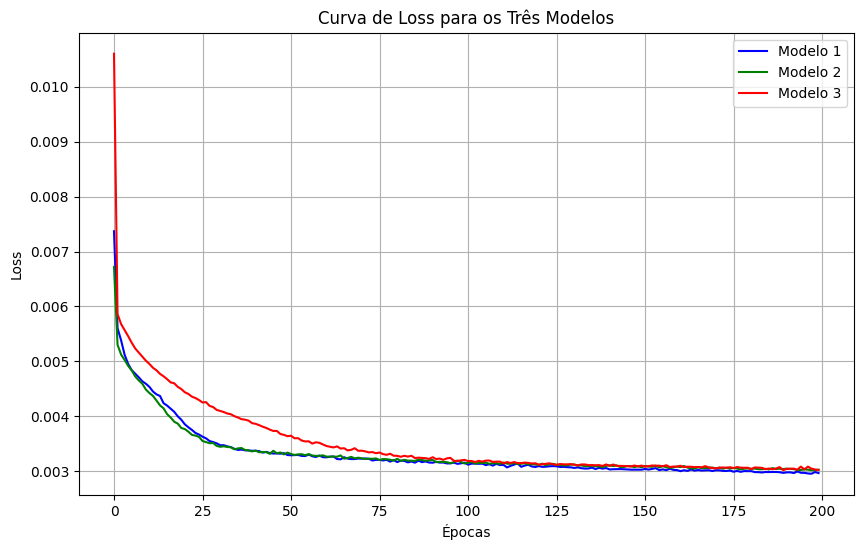

In [54]:
# Supondo que você tenha os objetos "history1", "history2" e "history3", que contêm informações sobre o treinamento dos três modelos.

# Plotando as curvas de loss
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo 1', color='blue')
plt.plot(history2.history['loss'], label='Modelo 2', color='green')
plt.plot(history3.history['loss'], label='Modelo 3', color='red')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para os Três Modelos')
plt.legend()
plt.grid(True)
plt.show()

### Avaliando a base de teste

In [55]:
# Passo 1: Pré-processamento dos novos dados de teste

# Divida os dados em variáveis de entrada (X) e variável de saída (y), similar ao que você fez para os dados de treinamento.
X_test = test[['preco_m_1lag',	'preco_m_2lag',	'preco_m_3lag',	'preco_m_4lag',	'preco_m_5lag']]

# Normalize os dados usando o mesmo scaler que você usou para os dados de treinamento.
X_test_scaled = scaler_X.transform(X_test)

# Converta os dados para o formato 3D esperado pela LSTM
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Passo 2: Fazer previsões com o modelo LSTM

# Use o método predict para fazer as previsões
y_pred_scaled1 = model1.predict(X_test_lstm)
y_pred_scaled2 = model2.predict(X_test_lstm)
y_pred_scaled3 = model3.predict(X_test_lstm)

# Como o modelo retorna as previsões em escala, desfaça a normalização para obter as previsões reais
y_pred1 = scaler_y.inverse_transform(y_pred_scaled1)
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled3)

410/410 [==============================] - 0s 395us/step


In [56]:
# Calcule o RMSE para cada modelo
rmse_model1 = np.sqrt(np.mean((np.array(test['PREÇO MÉDIO REVENDA']) - y_pred1) ** 2))
rmse_model2 = np.sqrt(np.mean((np.array(test['PREÇO MÉDIO REVENDA']) - y_pred2) ** 2))
rmse_model3 = np.sqrt(np.mean((np.array(test['PREÇO MÉDIO REVENDA']) - y_pred3) ** 2))

print('RMSE Modelo 1:', rmse_model1)
print('RMSE Modelo 2:', rmse_model2)
print('RMSE Modelo 3:', rmse_model3)

RMSE Modelo 1: 37.753329405889254
RMSE Modelo 2: 36.20389064125125
RMSE Modelo 3: 37.73865856108372


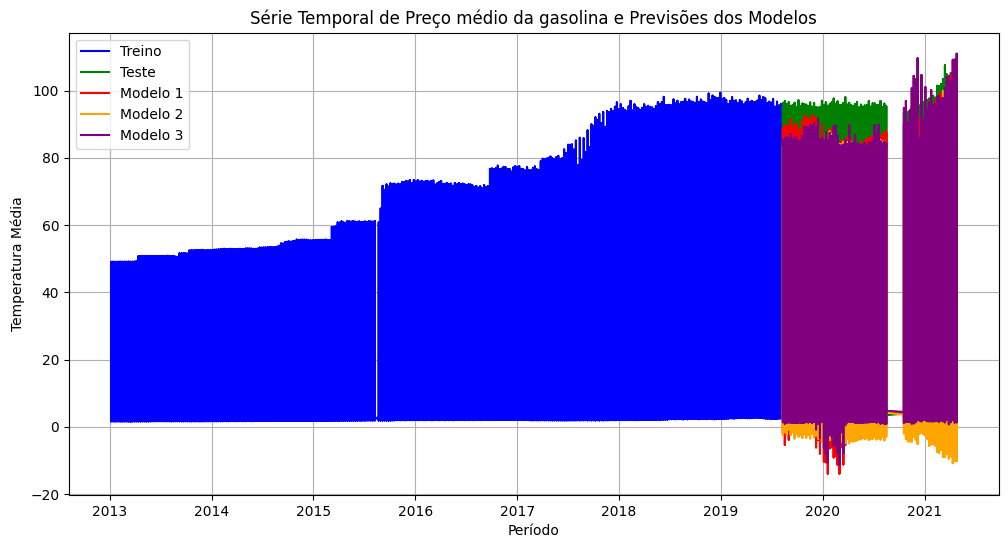

In [64]:
# Plotando a série temporal da coluna "value" da base de treino e teste
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['PREÇO MÉDIO REVENDA'], label='Treino', color='blue')
plt.plot(test.index, test['PREÇO MÉDIO REVENDA'], label='Teste', color='green')

# Plotando as previsões dos modelos em cores diferentes
plt.plot(test.index, y_pred1, label='Modelo 1', color='red')
plt.plot(test.index, y_pred2, label='Modelo 2', color='orange')
plt.plot(test.index, y_pred3, label='Modelo 3', color='purple')

plt.xlabel('Período')
plt.ylabel('Temperatura Média')
plt.title('Série Temporal de Preço médio da gasolina e Previsões dos Modelos')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [58]:
test['Modelo 1'] = y_pred1
test['Modelo 2'] = y_pred2
test['Modelo 3'] = y_pred3

test

/tmp/ipykernel_1350271/936593515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Modelo 1'] = y_pred1
/tmp/ipykernel_1350271/936593515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Modelo 2'] = y_pred2
/tmp/ipykernel_1350271/936593515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,...,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,preco_m_1lag,preco_m_2lag,preco_m_3lag,preco_m_4lag,preco_m_5lag,Modelo 1,Modelo 2,Modelo 3
DATA INICIAL,,,,,,,,,,,,,,,,,,,,,
2019-08-11,2019-08-17,NORTE,ACRE,ETANOL HIDRATADO,13,R$/l,3.866,0.125,3.690,4.150,...,3.5091,0.036,3.610,3.638,3.532,3.514,3.572,4.494530,4.049200,4.708025
2019-08-11,2019-08-17,NORDESTE,ALAGOAS,ETANOL HIDRATADO,53,R$/l,3.742,0.150,3.479,4.000,...,3.5951,0.035,3.866,3.610,3.638,3.532,3.514,4.726341,4.846326,5.015872
2019-08-11,2019-08-17,NORTE,AMAZONAS,ETANOL HIDRATADO,44,R$/l,3.368,0.191,3.240,3.970,...,3.1692,0.025,3.742,3.866,3.610,3.638,3.532,4.695280,4.383347,4.889919
2019-08-11,2019-08-17,NORDESTE,BAHIA,ETANOL HIDRATADO,332,R$/l,3.415,0.188,2.950,4.098,...,3.3703,0.046,3.368,3.742,3.866,3.610,3.638,3.476933,2.738845,3.494148
2019-08-11,2019-08-17,NORDESTE,CEARA,ETANOL HIDRATADO,199,R$/l,3.773,0.094,3.590,4.120,...,3.554,0.026,3.415,3.368,3.742,3.866,3.610,3.539914,2.869077,3.264457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,...,-99999.0,-99999.0,4.503,4.140,4.699,4.302,4.382,6.171248,7.194866,5.962132
2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,...,-99999.0,-99999.0,4.582,4.503,4.140,4.699,4.302,7.114932,6.990973,6.462232
2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,...,-99999.0,-99999.0,4.141,4.582,4.503,4.140,4.699,6.361446,6.126872,5.702675


### AutoSarima

In [62]:
!pip install pmdarima

In [60]:
import pmdarima as pm

In [63]:
# Crie o modelo AutoARIMA e encontre o melhor modelo ARIMA automaticamente
model4 = pm.auto_arima(np.array(train['Close']), exogenous=np.array(train[['preco_m_1lag',	'preco_m_2lag',	'preco_m_3lag',	'preco_m_4lag',	'preco_m_5lag']]), seasonal=True, m=7)  # O parâmetro "m" representa a frequência da sazonalidade (7 dias por semana)

# Faça as previsões usando o modelo treinado
y_pred4 = model4.predict(n_periods=len(np.array(test['Close'])), exogenous=np.array(test[['preco_m_1lag',	'preco_m_2lag',	'preco_m_3lag',	'preco_m_4lag',	'preco_m_5lag']]))

KeyError: 'Close'

In [ ]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1450
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -3171.399
Date:                Tue, 17 Oct 2023   AIC                           6356.798
Time:                        22:06:19   BIC                           6393.749
Sample:                             0   HQIC                          6370.587
                               - 1450                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5471      0.210      2.605      0.009       0.135       0.959
ar.L1         -1.9951      0.028    -71.414      0.000      -2.050      -1.940
ar.L2         -1.2787      0.040    -32.163      0.000      -1.357      -1.201
ar.L3         -0.1818      0.017    -10.908      0.000      -0.215      -0.149
ma.L1          1.7562      0.025     71.292      0.000       1.708       1.805
ma.L2          0.8583      0.023     38.027      0.000       0.814       0.903
sigma2         4.6606      0.072     65.142      0.000       4.520       4.801
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8558.80
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              17.49   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Calcule o RMSE para avaliar o desempenho do modelo
rmse = mean_squared_error(np.array(test['PREÇO MÉDIO REVENDA']), y_pred4, squared=False)
print(f"RMSE do AutoARIMA: {rmse}")

RMSE do AutoARIMA: 13.080253007313543


In [ ]:
result = pd.DataFrame(index=test.index)

In [ ]:
result['Modelo 1'] = y_pred1

In [ ]:
result['Modelo 2'] = y_pred2

In [ ]:
result['Modelo 3'] = y_pred3

In [ ]:
result.to_csv('LUCAS_DA_SILVA_SANTOS_ARTHUR_VINICIUS_SANTOS_SILVA.csv')